In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_data = pd.read_csv("/content/train_data.csv")
test_data = pd.read_csv("/content/test_data.csv")

train_data

,Period Code,Cycle ID,B_2,B_3,B_4,B_5,B_9,B_10,B_14,B_15,...,B_18,B_19,B_20,B_21,B_22,B_23,B_24,B_25,Good/Bad,timestamp
0,1,1,-0.0007,-0.0004,100,518.67,14.62,21.61,1.3,47.47,...,8138.62,8.4195,0.03,392,2388,100,39.06,23.419,0,3/1/2020 0:00
1,1,2,0.0019,-0.0003,100,518.67,14.62,21.61,1.3,47.49,...,8131.49,8.4318,0.03,392,2388,100,39,23.4236,0,3/1/2020 0:05
2,1,3,-0.0043,0.0003,100,518.67,14.62,21.61,1.3,47.27,...,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,0,3/1/2020 0:10
3,1,4,0.0007,0,100,518.67,14.62,21.61,1.3,47.13,...,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,0,3/1/2020 0:15
4,1,5,-0.0019,-0.0002,100,518.67,14.62,21.61,1.3,47.28,...,8133.8,8.4294,0.03,393,2388,100,38.9,23.4044,0,3/1/2020 0:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16499,82,122,-0.0001,0.0002,100,518.67,14.62,21.61,1.3,47.48,...,8163.51,8.4098,0.03,392,2388,100,38.88,23.3777,0,4/27/2020 6:55
16500,82,123,0.0016,0.0002,100,518.67,14.62,21.6,1.3,47.15,...,8153.63,8.3746,0.03,392,2388,100,38.89,23.3542,0,4/27/2020 7:00
16501,82,124,Missing,-0.0005,100,518.67,14.62,21.61,1.3,47.48,...,8162.75,8.414,0.03,391,2388,100,38.9,23.3692,0,4/27/2020 7:05
16502,82,125,0.0001,-0.0002,100,518.67,14.62,21.6,1.3,47.12,...,8150.24,8.4058,0.03,391,2388,100,38.99,23.4025,0,4/27/2020 7:10


In [3]:
train_data.shape

(16504, 22)

In [4]:
missing_values = train_data.isnull().sum()
missing_values

target_distribution = train_data['Good/Bad'].value_counts(normalize=True)

missing_values, target_distribution

(Period Code    29
 Cycle ID       36
 B_2            40
 B_3            44
 B_4            42
 B_5            35
 B_9            29
 B_10           44
 B_14           44
 B_15           46
 B_16           37
 B_17           41
 B_18           35
 B_19           37
 B_20           40
 B_21           29
 B_22           27
 B_23           31
 B_24           41
 B_25           37
 Good/Bad       39
 timestamp       0
 dtype: int64,
 0                0.833222
 1                0.150258
 no response      0.002490
 I/O              0.002490
 Missing          0.002369
 No Data          0.002186
 Bad              0.001883
 stop             0.001822
 no connection    0.001761
 start            0.001518
 Name: Good/Bad, dtype: float64)

In [5]:
train_data["Good/Bad"].value_counts()

0                13719
1                 2474
no response         41
I/O                 41
Missing             39
No Data             36
Bad                 31
stop                30
no connection       29
start               25
Name: Good/Bad, dtype: int64

In [6]:
train_data['Good/Bad'].value_counts().values.tolist()

[13719, 2474, 41, 41, 39, 36, 31, 30, 29, 25]

In [7]:
import plotly.graph_objects as go
import plotly.offline as po
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt
import plotly.express as px
import random
import plotly.figure_factory as ff
from plotly.offline import iplot
x = train_data['Good/Bad'].value_counts().keys().tolist()
y =train_data['Good/Bad'].value_counts().values.tolist()
data = go.Bar(
             x= x,
             y= y,
             marker_color= '#FFA726', # Changing color of Bars
             marker_line_color = '#A04000', # Changing color of border
             marker_line_width = 2, # Changing width of border
             opacity=0.7, # Changing opacity of Bars
            text=y
             )

layout = go.Layout(
                  title = 'Target Column Value counts',
                  width=850,
                  height=550
                  )


fig = go.Figure(data=data,layout=layout)
fig.show()

In [8]:
good_bad_mapping = {
    '0': 'Bad',
    '1': 'Good',
    'no response': 'Bad',
    'I/O': 'Bad',
    'Missing': 'Bad',
    'No Data': 'Bad',
    'Bad': 'Bad',
    'stop': 'Bad',
    'no connection': 'Bad',
    'start': 'Good'
}


train_data['Good/Bad'] = train_data['Good/Bad'].map(good_bad_mapping)


train_data['Good/Bad Binary'] = train_data['Good/Bad'].map({'Good': 1, 'Bad': 0})


train_data[['Good/Bad', 'Good/Bad Binary']].head()

,Good/Bad,Good/Bad Binary
0,Bad,0.0
1,Bad,0.0
2,Bad,0.0
3,Bad,0.0
4,Bad,0.0


In [9]:
train_data.drop("Good/Bad", axis = 1, inplace = True)
train_data.rename(columns = {"Good/Bad Binary":"Good/Bad"}, inplace=True)

In [10]:
train_data

,Period Code,Cycle ID,B_2,B_3,B_4,B_5,B_9,B_10,B_14,B_15,...,B_18,B_19,B_20,B_21,B_22,B_23,B_24,B_25,timestamp,Good/Bad
0,1,1,-0.0007,-0.0004,100,518.67,14.62,21.61,1.3,47.47,...,8138.62,8.4195,0.03,392,2388,100,39.06,23.419,3/1/2020 0:00,0.0
1,1,2,0.0019,-0.0003,100,518.67,14.62,21.61,1.3,47.49,...,8131.49,8.4318,0.03,392,2388,100,39,23.4236,3/1/2020 0:05,0.0
2,1,3,-0.0043,0.0003,100,518.67,14.62,21.61,1.3,47.27,...,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,3/1/2020 0:10,0.0
3,1,4,0.0007,0,100,518.67,14.62,21.61,1.3,47.13,...,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,3/1/2020 0:15,0.0
4,1,5,-0.0019,-0.0002,100,518.67,14.62,21.61,1.3,47.28,...,8133.8,8.4294,0.03,393,2388,100,38.9,23.4044,3/1/2020 0:20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16499,82,122,-0.0001,0.0002,100,518.67,14.62,21.61,1.3,47.48,...,8163.51,8.4098,0.03,392,2388,100,38.88,23.3777,4/27/2020 6:55,0.0
16500,82,123,0.0016,0.0002,100,518.67,14.62,21.6,1.3,47.15,...,8153.63,8.3746,0.03,392,2388,100,38.89,23.3542,4/27/2020 7:00,0.0
16501,82,124,Missing,-0.0005,100,518.67,14.62,21.61,1.3,47.48,...,8162.75,8.414,0.03,391,2388,100,38.9,23.3692,4/27/2020 7:05,0.0
16502,82,125,0.0001,-0.0002,100,518.67,14.62,21.6,1.3,47.12,...,8150.24,8.4058,0.03,391,2388,100,38.99,23.4025,4/27/2020 7:10,0.0


In [11]:
train_data['B_4'].value_counts()

100              16175
I/O                 41
No Data             40
start               40
no connection       38
stop                35
Missing             32
Bad                 31
no response         30
Name: B_4, dtype: int64

In [12]:
x = train_data['B_4'].value_counts().keys().tolist()
y =train_data['B_4'].value_counts().values.tolist()
data = go.Bar(
             x= x,
             y= y,
             marker_color= '#FFA726', # Changing color of Bars
             marker_line_color = '#A04000', # Changing color of border
             marker_line_width = 2, # Changing width of border
             opacity=0.7, # Changing opacity of Bars
            text=y
             )

layout = go.Layout(
                  title = 'B_4',
                  width=850,
                  height=550
                  )


fig = go.Figure(data=data,layout=layout)
fig.show()

In [13]:
train_data['Good/Bad'] = pd.to_numeric(train_data['Good/Bad'], errors='coerce')


cleaned_train_data = train_data.dropna(subset=['Good/Bad'])

cleaned_target_distribution = cleaned_train_data['Good/Bad'].value_counts(normalize=True)

cleaned_missing_values = cleaned_train_data.isnull().sum()

cleaned_missing_values, cleaned_target_distribution

(Period Code    29
 Cycle ID       36
 B_2            40
 B_3            44
 B_4            42
 B_5            34
 B_9            29
 B_10           44
 B_14           43
 B_15           46
 B_16           37
 B_17           41
 B_18           35
 B_19           37
 B_20           40
 B_21           29
 B_22           27
 B_23           31
 B_24           41
 B_25           37
 timestamp       0
 Good/Bad        0
 dtype: int64,
 0.0    0.848224
 1.0    0.151776
 Name: Good/Bad, dtype: float64)

In [14]:
train_data

,Period Code,Cycle ID,B_2,B_3,B_4,B_5,B_9,B_10,B_14,B_15,...,B_18,B_19,B_20,B_21,B_22,B_23,B_24,B_25,timestamp,Good/Bad
0,1,1,-0.0007,-0.0004,100,518.67,14.62,21.61,1.3,47.47,...,8138.62,8.4195,0.03,392,2388,100,39.06,23.419,3/1/2020 0:00,0.0
1,1,2,0.0019,-0.0003,100,518.67,14.62,21.61,1.3,47.49,...,8131.49,8.4318,0.03,392,2388,100,39,23.4236,3/1/2020 0:05,0.0
2,1,3,-0.0043,0.0003,100,518.67,14.62,21.61,1.3,47.27,...,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,3/1/2020 0:10,0.0
3,1,4,0.0007,0,100,518.67,14.62,21.61,1.3,47.13,...,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,3/1/2020 0:15,0.0
4,1,5,-0.0019,-0.0002,100,518.67,14.62,21.61,1.3,47.28,...,8133.8,8.4294,0.03,393,2388,100,38.9,23.4044,3/1/2020 0:20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16499,82,122,-0.0001,0.0002,100,518.67,14.62,21.61,1.3,47.48,...,8163.51,8.4098,0.03,392,2388,100,38.88,23.3777,4/27/2020 6:55,0.0
16500,82,123,0.0016,0.0002,100,518.67,14.62,21.6,1.3,47.15,...,8153.63,8.3746,0.03,392,2388,100,38.89,23.3542,4/27/2020 7:00,0.0
16501,82,124,Missing,-0.0005,100,518.67,14.62,21.61,1.3,47.48,...,8162.75,8.414,0.03,391,2388,100,38.9,23.3692,4/27/2020 7:05,0.0
16502,82,125,0.0001,-0.0002,100,518.67,14.62,21.6,1.3,47.12,...,8150.24,8.4058,0.03,391,2388,100,38.99,23.4025,4/27/2020 7:10,0.0


In [15]:
train_data.isna().sum()

Period Code    29
Cycle ID       36
B_2            40
B_3            44
B_4            42
B_5            35
B_9            29
B_10           44
B_14           44
B_15           46
B_16           37
B_17           41
B_18           35
B_19           37
B_20           40
B_21           29
B_22           27
B_23           31
B_24           41
B_25           37
timestamp       0
Good/Bad       39
dtype: int64

In [16]:
numeric_columns = train_data.columns.difference(['timestamp', 'Good/Bad'])
train_data[numeric_columns] = train_data[numeric_columns].apply(pd.to_numeric, errors='coerce')


missing_values_after_conversion = train_data.isnull().sum()


summary_statistics_after_conversion = train_data.describe()

missing_values_after_conversion, summary_statistics_after_conversion

(Period Code    318
 Cycle ID       310
 B_2            311
 B_3            330
 B_4            329
 B_5            313
 B_9            306
 B_10           301
 B_14           317
 B_15           302
 B_16           324
 B_17           328
 B_18           316
 B_19           318
 B_20           315
 B_21           313
 B_22           320
 B_23           317
 B_24           317
 B_25           327
 timestamp        0
 Good/Bad        39
 dtype: int64,
         Period Code      Cycle ID           B_2           B_3      B_4  \
 count  16186.000000  16194.000000  16193.000000  16174.000000  16175.0   
 mean      41.557025    105.364518      0.000016      0.000001    100.0   
 std       23.883894     65.980368      0.002190      0.000294      0.0   
 min        1.000000      1.000000     -0.008600     -0.000600    100.0   
 25%       20.000000     51.000000     -0.001400     -0.000300    100.0   
 50%       42.000000    101.000000      0.000000      0.000000    100.0   
 75%       63.000000

In [17]:
columns_with_constant_values = [col for col in train_data.columns if train_data[col].nunique() == 1]
train_data_cleaned = train_data.drop(columns=columns_with_constant_values)


train_data_imputed = train_data_cleaned.fillna(train_data_cleaned.median())


missing_values_after_imputation = train_data_imputed.isnull().sum()


remaining_columns = train_data_imputed.columns

missing_values_after_imputation, remaining_columns

<ipython-input-17-171fc495be56>:5: FutureWarning:

The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



(Period Code    0
 Cycle ID       0
 B_2            0
 B_3            0
 B_10           0
 B_15           0
 B_16           0
 B_17           0
 B_18           0
 B_19           0
 B_21           0
 B_24           0
 B_25           0
 timestamp      0
 Good/Bad       0
 dtype: int64,
 Index(['Period Code', 'Cycle ID', 'B_2', 'B_3', 'B_10', 'B_15', 'B_16', 'B_17',
        'B_18', 'B_19', 'B_21', 'B_24', 'B_25', 'timestamp', 'Good/Bad'],
       dtype='object'))

In [18]:
train_data['Good/Bad'].value_counts()

0.0    13966
1.0     2499
Name: Good/Bad, dtype: int64

In [19]:
x = train_data['Good/Bad'].value_counts().keys().tolist()
y =train_data['Good/Bad'].value_counts().values.tolist()
data = go.Bar(
             x= x,
             y= y,
             marker_color= '#FFA726', # Changing color of Bars
             marker_line_color = '#A04000', # Changing color of border
             marker_line_width = 2, # Changing width of border
             opacity=0.7, # Changing opacity of Bars
            text=y
             )

layout = go.Layout(
                  title = 'After cleaning Target Column Value counts',
                  width=850,
                  height=550
                  )


fig = go.Figure(data=data,layout=layout)
fig.show()

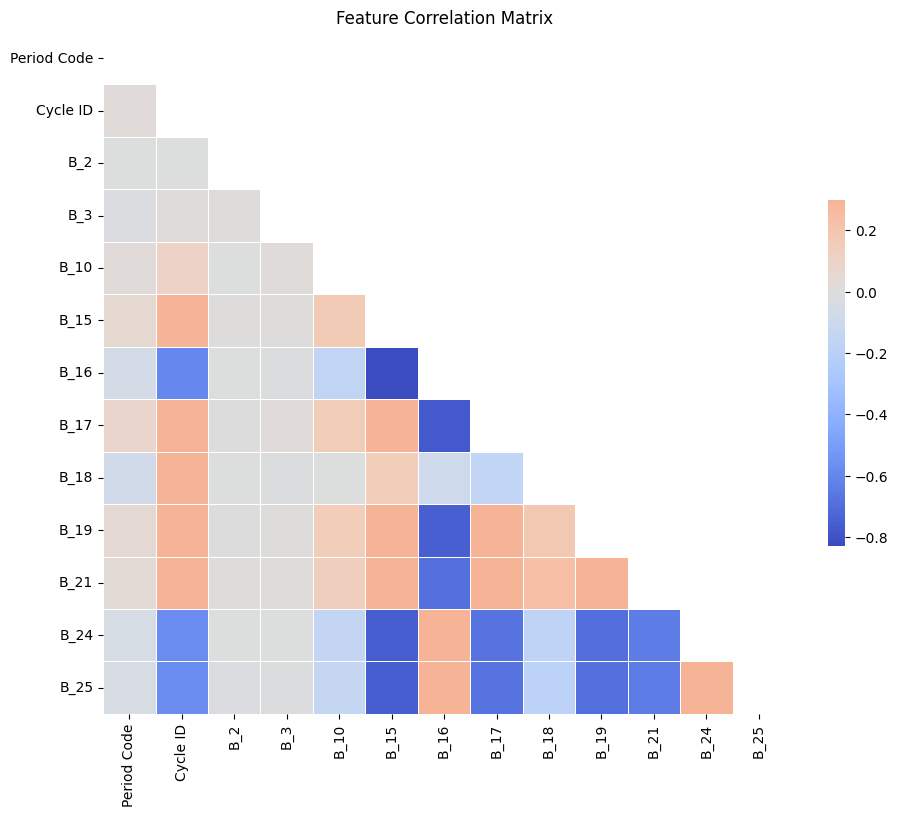

<ipython-input-20-da3e93f9480f>:20: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Good/Bad       1.000000
B_15           0.645492
B_19           0.604383
B_21           0.570844
B_17           0.519248
Cycle ID       0.512079
B_18           0.340570
B_10           0.058884
B_2            0.006757
B_3            0.004531
Period Code   -0.010923
B_24          -0.585504
B_25          -0.595642
B_16          -0.621462
Name: Good/Bad, dtype: float64

In [20]:
import numpy as np
import seaborn as sns

correlation_matrix = train_data_imputed.drop(columns=['Good/Bad', 'timestamp']).corr()


mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))


f, ax = plt.subplots(figsize=(11, 9))


sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Feature Correlation Matrix')
plt.show()


target_correlation = train_data_imputed.corr()['Good/Bad'].sort_values(ascending=False)
target_correlation

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler


X = train_data_imputed.drop(columns=['Good/Bad', 'timestamp'])  # Features
y = train_data_imputed['Good/Bad']  # Target variable

oversampler = RandomOverSampler()
X_resampled,y_resampled = oversampler.fit_resample(X,y)

X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)



In [22]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [23]:
pred = logistic_model.predict(X_val)

In [24]:
log_score = cross_val_score(logistic_model, X_train, y_train, cv=5, scoring='roc_auc')

In [25]:
log_score

array([0.97947444, 0.97439308, 0.97445123, 0.97844056, 0.97520554])

In [26]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
pred1= random_forest_model.predict(X_val)

In [28]:
random_forest_score = cross_val_score(random_forest_model, X_train, y_train, cv=5, scoring='roc_auc')

In [29]:
random_forest_score

array([0.99859336, 0.99909407, 0.99892839, 0.99882213, 0.99944827])

In [30]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [31]:
pred3= xgb_model.predict(X_val)

In [32]:
xgb_score = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='roc_auc')

In [33]:
xgb_score

array([0.99766422, 0.99774477, 0.99656613, 0.99709642, 0.99784984])

In [34]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

params = {
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5],
    'lambda': [1, 1.5, 2],
    'alpha': [0, 0.5, 1]
}


xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')


grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, scoring='roc_auc', n_jobs=-1, cv=5, verbose=3)

grid_search.fit(X_train, y_train)


best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found: ", best_parameters)
print("Best ROC AUC score found: ", best_score)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found:  {'alpha': 0, 'gamma': 0.5, 'lambda': 1.5, 'max_depth': 5, 'min_child_weight': 1}
Best ROC AUC score found:  0.9967837592663411


In [35]:
best_parameters = {
    'alpha': 0, 'gamma': 0.5, 'lambda': 1, 'max_depth': 5, 'min_child_weight': 1
}


In [36]:

final_xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    max_depth=best_parameters['max_depth'],
    min_child_weight=best_parameters['min_child_weight'],
    gamma=best_parameters['gamma'],
    reg_lambda=best_parameters['lambda'],
    reg_alpha=best_parameters['alpha']
)


final_xgb_model.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [37]:
pred_new = final_xgb_model.predict(X_val)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_model = RandomForestClassifier(random_state=42)

rf_random_search = RandomizedSearchCV(rf_model, param_dist, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

rf_random_search.fit(X_train, y_train)

best_rf_parameters = rf_random_search.best_params_
best_rf_score = rf_random_search.best_score_

(best_rf_parameters, best_rf_score)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


({'n_estimators': 500,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_features': 'sqrt',
  'max_depth': 20},
 0.9763923697348117)

In [39]:
final_rf_model = RandomForestClassifier(
    n_estimators=best_rf_parameters['n_estimators'],
    max_depth=best_rf_parameters['max_depth'],
    min_samples_split=best_rf_parameters['min_samples_split'],
    min_samples_leaf=best_rf_parameters['min_samples_leaf'],
    max_features=best_rf_parameters['max_features'],
    random_state=42
)

final_rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, n_estimators=500, random_state=42)

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

dt_model = DecisionTreeClassifier(random_state=42)

dt_grid_search = GridSearchCV(dt_model, param_grid, cv=3, verbose=2, n_jobs=-1)

dt_grid_search.fit(X_train, y_train)

best_dt_parameters = dt_grid_search.best_params_
best_dt_score = dt_grid_search.best_score_

print("Best parameters found: ", best_dt_parameters)
print("Best score found: ", best_dt_score)


Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score found:  0.9691628446814139


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.



In [41]:
final_dt_model = DecisionTreeClassifier(
    max_depth=best_dt_parameters['max_depth'],
    min_samples_split=best_dt_parameters['min_samples_split'],
    min_samples_leaf=best_dt_parameters['min_samples_leaf'],
    max_features=best_dt_parameters['max_features'],
    criterion=best_dt_parameters['criterion'],
    random_state=42
)

final_dt_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.



DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='auto',
                       random_state=42)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:               Good/Bad   No. Observations:                16464
Model:                 ARIMA(0, 0, 3)   Log Likelihood                6509.477
Date:                Sat, 04 Nov 2023   AIC                         -13008.954
Time:                        12:40:36   BIC                         -12970.409
Sample:                             0   HQIC                        -12996.223
                              - 16464                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1518      0.005     29.422      0.000       0.142       0.162
ma.L1          0.9863      0.004    225.791      0.000       0.978       0.995
ma.L2          0.8113      0.006    129.296      0.0

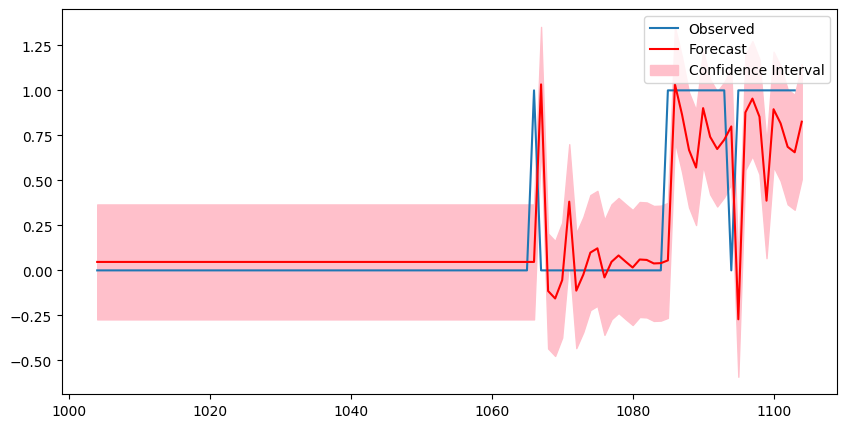

In [42]:
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn import metrics
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

train_data_clean = train_data['Good/Bad'].iloc[1:].dropna()

model = ARIMA(train_data_clean, order=(0, 0, 3))  # Using an MA(3) model as an example
result = model.fit()

print(result.summary())

start_index = 1000
end_index = 1100
predictions = result.get_prediction(start=start_index, end=end_index)
pred_mean = predictions.predicted_mean
pred_conf = predictions.conf_int()

plt.figure(figsize=(10, 5))
plt.plot(train_data_clean.index[start_index:end_index], train_data_clean[start_index:end_index], label='Observed')
plt.plot(pred_mean.index, pred_mean, color='r', label='Forecast')
plt.fill_between(pred_conf.index,
                 pred_conf.iloc[:, 0],
                 pred_conf.iloc[:, 1], color='pink', label='Confidence Interval')
plt.legend()
plt.show()


In [43]:

n_steps = len(test_data)
forecast_results = result.get_forecast(steps=n_steps)
forecasted_values = forecast_results.predicted_mean
confidence_intervals = forecast_results.conf_int()
forecasted_values, confidence_intervals



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



(16464    0.046901
 16465    0.093159
 16466    0.131212
 16467    0.151756
 16468    0.151756
            ...   
 20586    0.151756
 20587    0.151756
 20588    0.151756
 20589    0.151756
 20590    0.151756
 Name: predicted_mean, Length: 4127, dtype: float64,
        lower Good/Bad  upper Good/Bad
 16464       -0.272449        0.366252
 16465       -0.355384        0.541703
 16466       -0.386789        0.649214
 16467       -0.384799        0.688311
 16468       -0.384799        0.688311
 ...               ...             ...
 20586       -0.384799        0.688311
 20587       -0.384799        0.688311
 20588       -0.384799        0.688311
 20589       -0.384799        0.688311
 20590       -0.384799        0.688311
 
 [4127 rows x 2 columns])

In [44]:
threshold = 0.5
binary_predictions = (forecasted_values >= threshold).astype(int)

binary_predictions


16464    0
16465    0
16466    0
16467    0
16468    0
        ..
20586    0
20587    0
20588    0
20589    0
20590    0
Name: predicted_mean, Length: 4127, dtype: int64

In [45]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 1000, 10000]
}

log_reg = LogisticRegression()

grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='roc_auc', verbose=2, n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_

best_log_reg = LogisticRegression(**best_params)
best_log_reg.fit(X_train_scaled, y_train)


print("Best Parameters:", best_params)



Fitting 5 folds for each of 360 candidates, totalling 1800 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


810 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: S

Best Parameters: {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'sag'}


In [46]:

final_log_reg_model = LogisticRegression(
    penalty='l2',
    C=best_params['C'],
    solver='sag',
    max_iter=best_params['max_iter']
)

final_log_reg_model.fit(X_train_scaled, y_train)




LogisticRegression(C=100, solver='sag')

In [47]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [48]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)


DecisionTreeClassifier()

In [49]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [50]:
dtc = grid_search.best_estimator_

In [52]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_model = AdaBoostClassifier()
ada_boost_model.fit(X_train, y_train)



AdaBoostClassifier()

In [53]:
ada = AdaBoostClassifier(base_estimator = dtc, algorithm = 'SAMME.R', learning_rate = 10, n_estimators = 70)
ada.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                         min_samples_leaf=2,
                                                         min_samples_split=3),
                   learning_rate=10, n_estimators=70)

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting_model = GradientBoostingClassifier()

gradient_boosting_model.fit(X_train, y_train)



GradientBoostingClassifier()

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

stochastic_gradient_boosting_model = GradientBoostingClassifier(
    subsample=0.8,
    n_iter_no_change=5,
    validation_fraction=0.1,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3
)
stochastic_gradient_boosting_model.fit(X_train, y_train)



GradientBoostingClassifier(n_iter_no_change=5, subsample=0.8)

In [56]:
! pip install catboost

In [57]:
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    verbose=False,
    random_seed=42
)

catboost_model.fit(X_train, y_train)



In [58]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations = 180, learning_rate = 0.1)
cat.fit(X_train, y_train)

0:	learn: 0.6191529	total: 36.3ms	remaining: 6.5s
1:	learn: 0.5599054	total: 52ms	remaining: 4.63s
2:	learn: 0.5111337	total: 78ms	remaining: 4.6s
3:	learn: 0.4675146	total: 88.2ms	remaining: 3.88s
4:	learn: 0.4310853	total: 97.7ms	remaining: 3.42s
5:	learn: 0.3993096	total: 120ms	remaining: 3.48s
6:	learn: 0.3715308	total: 132ms	remaining: 3.26s
7:	learn: 0.3472419	total: 140ms	remaining: 3.01s
8:	learn: 0.3263173	total: 147ms	remaining: 2.8s
9:	learn: 0.3077618	total: 158ms	remaining: 2.69s
10:	learn: 0.2908101	total: 166ms	remaining: 2.55s
11:	learn: 0.2760200	total: 173ms	remaining: 2.42s
12:	learn: 0.2635789	total: 181ms	remaining: 2.32s
13:	learn: 0.2516851	total: 188ms	remaining: 2.22s
14:	learn: 0.2414513	total: 197ms	remaining: 2.17s
15:	learn: 0.2326745	total: 204ms	remaining: 2.09s
16:	learn: 0.2246004	total: 211ms	remaining: 2.02s
17:	learn: 0.2168930	total: 219ms	remaining: 1.97s
18:	learn: 0.2098961	total: 232ms	remaining: 1.97s
19:	learn: 0.2038735	total: 238ms	remaining

In [59]:
train_data_imputed

,Period Code,Cycle ID,B_2,B_3,B_10,B_15,B_16,B_17,B_18,B_19,B_21,B_24,B_25,timestamp,Good/Bad
0,1.0,1.0,-0.0007,-0.0004,21.61,47.47,521.66,2388.02,8138.62,8.4195,392.0,39.06,23.4190,3/1/2020 0:00,0.0
1,1.0,2.0,0.0019,-0.0003,21.61,47.49,522.28,2388.07,8131.49,8.4318,392.0,39.00,23.4236,3/1/2020 0:05,0.0
2,1.0,3.0,-0.0043,0.0003,21.61,47.27,522.42,2388.03,8133.23,8.4178,390.0,38.95,23.3442,3/1/2020 0:10,0.0
3,1.0,4.0,0.0007,0.0000,21.61,47.13,522.86,2388.08,8133.83,8.3682,392.0,38.88,23.3739,3/1/2020 0:15,0.0
4,1.0,5.0,-0.0019,-0.0002,21.61,47.28,522.19,2388.04,8133.80,8.4294,393.0,38.90,23.4044,3/1/2020 0:20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16499,82.0,122.0,-0.0001,0.0002,21.61,47.48,521.37,2388.05,8163.51,8.4098,392.0,38.88,23.3777,4/27/2020 6:55,0.0
16500,82.0,123.0,0.0016,0.0002,21.60,47.15,522.09,2388.09,8153.63,8.3746,392.0,38.89,23.3542,4/27/2020 7:00,0.0
16501,82.0,124.0,0.0000,-0.0005,21.61,47.48,522.52,2388.00,8162.75,8.4140,391.0,38.90,23.3692,4/27/2020 7:05,0.0
16502,82.0,125.0,0.0001,-0.0002,21.60,47.12,522.38,2388.00,8150.24,8.4058,391.0,38.99,23.4025,4/27/2020 7:10,0.0


In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)



GaussianNB()

In [62]:
test_data = pd.read_csv("/content/test_data.csv")
Id = test_data['timestamp'].astype(str) + '-' + test_data['Cycle ID'].astype(str)
test_data.drop('timestamp',axis=1,inplace=True)
test_data

,Period Code,Cycle ID,B_2,B_3,B_4,B_5,B_9,B_10,B_14,B_15,B_16,B_17,B_18,B_19,B_20,B_21,B_22,B_23,B_24,B_25
0,82,127,-0.0014,-0.0003,100,518.67,14.62,21.61,1.3,47.28,521.83,2388.04,8158.04,8.4314,0.03,393,2388,100,39.07,23.28
1,82,128,-0.0003,0.0003,100,518.67,14.62,21.61,1.3,47.35,521.84,2388.02,8154.69,8.3897,0.03,391,2388,100,38.8,23.3672
2,82,129,-0.002,0,100,518.67,14.62,21.61,1.3,47.2,522.02,2388.01,8152.23,8.4298,0.03,392,2388,100,38.87,23.3531
3,82,130,no response,-0.0002,100,518.67,14.62,21.61,1.3,47.4,521.67,2388,8158.26,8.4078,0.03,391,stop,100,39.02,23.2821
4,82,Bad,-0.0011,0.0003,100,518.67,14.62,21.61,1.3,47.31,521.8,2388.01,8154.09,8.449,0.03,391,2388,100,38.89,23.2888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4122,100,196,-0.0004,-0.0003,100,518.67,14.62,21.61,1.3,48.07,519.49,2388.26,8137.6,8.4956,0.03,397,2388,100,38.49,22.9735
4123,100,197,-0.0016,-0.0005,100,518.67,14.62,21.61,1.3,48.04,519.68,2388.22,8136.5,8.5139,0.03,395,2388,100,38.3,23.1594
4124,100,198,0.0004,0,100,518.67,14.62,21.61,no response,48.09,520.01,2388.24,8141.05,8.5646,I/O,398,2388,100,38.44,22.9333
4125,100,199,-0.0011,0.0003,100,518.67,14.62,21.61,1.3,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100,38.29,23.064


In [63]:
Id.value_counts()

4/27/2020 7:20-127     1
5/6/2020 17:05-203     1
5/6/2020 19:55-237     1
5/6/2020 20:00-238     1
5/6/2020 20:05-239     1
                      ..
5/2/2020 2:25-90       1
5/2/2020 2:30-91       1
5/2/2020 2:35-92       1
5/2/2020 2:40-93       1
5/11/2020 15:10-200    1
Length: 4127, dtype: int64

In [64]:
test_data.shape

(4127, 20)

In [65]:
test_data.isnull().sum()

Period Code    10
Cycle ID        4
B_2             8
B_3             5
B_4             6
B_5             5
B_9            11
B_10            9
B_14            5
B_15            6
B_16            3
B_17            6
B_18           10
B_19            9
B_20            3
B_21            8
B_22            7
B_23            7
B_24           15
B_25           10
dtype: int64

In [66]:
numeric_columns = test_data.columns.difference(['timestamp', 'Good/Bad'])
test_data[numeric_columns] = test_data[numeric_columns].apply(pd.to_numeric, errors='coerce')


missing_values_after_conversion = test_data.isnull().sum()


summary_statistics_after_conversion = test_data.describe()

missing_values_after_conversion, summary_statistics_after_conversion

(Period Code    79
 Cycle ID       86
 B_2            81
 B_3            68
 B_4            68
 B_5            83
 B_9            88
 B_10           94
 B_14           80
 B_15           96
 B_16           71
 B_17           72
 B_18           78
 B_19           77
 B_20           77
 B_21           84
 B_22           72
 B_23           78
 B_24           79
 B_25           69
 dtype: int64,
        Period Code     Cycle ID          B_2          B_3     B_4      B_5  \
 count  4048.000000  4041.000000  4046.000000  4059.000000  4059.0  4044.00   
 mean     91.098567   122.287305    -0.000110     0.000008   100.0   518.67   
 std       5.333774    78.274491     0.002183     0.000288     0.0     0.00   
 min      82.000000     1.000000    -0.008700    -0.000600   100.0   518.67   
 25%      86.000000    58.000000    -0.001600    -0.000200   100.0   518.67   
 50%      92.000000   115.000000    -0.000100     0.000000   100.0   518.67   
 75%      96.000000   176.000000     0.001400     0.

In [67]:
columns_with_constant_values = [col for col in test_data.columns if test_data[col].nunique() == 1]
test_data_cleaned = test_data.drop(columns=columns_with_constant_values)


test_data_imputed = test_data_cleaned.fillna(test_data_cleaned.median())


missing_values_after_imputation = test_data_imputed.isnull().sum()


remaining_columns = test_data_imputed.columns

missing_values_after_imputation, remaining_columns

(Period Code    0
 Cycle ID       0
 B_2            0
 B_3            0
 B_10           0
 B_15           0
 B_16           0
 B_17           0
 B_18           0
 B_19           0
 B_21           0
 B_24           0
 B_25           0
 dtype: int64,
 Index(['Period Code', 'Cycle ID', 'B_2', 'B_3', 'B_10', 'B_15', 'B_16', 'B_17',
        'B_18', 'B_19', 'B_21', 'B_24', 'B_25'],
       dtype='object'))

In [68]:
test_data_imputed

,Period Code,Cycle ID,B_2,B_3,B_10,B_15,B_16,B_17,B_18,B_19,B_21,B_24,B_25
0,82.0,127.0,-0.0014,-0.0003,21.61,47.28,521.83,2388.04,8158.04,8.4314,393.0,39.07,23.2800
1,82.0,128.0,-0.0003,0.0003,21.61,47.35,521.84,2388.02,8154.69,8.3897,391.0,38.80,23.3672
2,82.0,129.0,-0.0020,0.0000,21.61,47.20,522.02,2388.01,8152.23,8.4298,392.0,38.87,23.3531
3,82.0,130.0,-0.0001,-0.0002,21.61,47.40,521.67,2388.00,8158.26,8.4078,391.0,39.02,23.2821
4,82.0,115.0,-0.0011,0.0003,21.61,47.31,521.80,2388.01,8154.09,8.4490,391.0,38.89,23.2888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4122,100.0,196.0,-0.0004,-0.0003,21.61,48.07,519.49,2388.26,8137.60,8.4956,397.0,38.49,22.9735
4123,100.0,197.0,-0.0016,-0.0005,21.61,48.04,519.68,2388.22,8136.50,8.5139,395.0,38.30,23.1594
4124,100.0,198.0,0.0004,0.0000,21.61,48.09,520.01,2388.24,8141.05,8.5646,398.0,38.44,22.9333
4125,100.0,199.0,-0.0011,0.0003,21.61,48.39,519.67,2388.23,8139.29,8.5389,395.0,38.29,23.0640


In [69]:
test_data_imputed.isnull().sum()

Period Code    0
Cycle ID       0
B_2            0
B_3            0
B_10           0
B_15           0
B_16           0
B_17           0
B_18           0
B_19           0
B_21           0
B_24           0
B_25           0
dtype: int64

In [70]:
pred_new = final_xgb_model.predict(test_data_imputed)

In [71]:
pred_new = final_rf_model.predict(test_data_imputed)

In [72]:
pred_new = final_dt_model.predict(test_data_imputed)

In [73]:
pred_new = final_log_reg_model.predict(test_data_imputed)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



In [74]:
pred_new = logmodel.predict(test_data_imputed)

In [75]:
pred_new = dtc.predict(test_data_imputed)

In [76]:
pred_new = ada.predict(test_data_imputed)

In [77]:
pred_new = gradient_boosting_model.predict(test_data_imputed)

In [78]:
pred_new = ada_boost_model.predict(test_data_imputed)

In [79]:
pred_new = stochastic_gradient_boosting_model.predict(test_data_imputed)

In [80]:
pred_new = catboost_model.predict(test_data_imputed)

In [81]:
pred_new = cat.predict(test_data_imputed)

In [82]:
pred_new = knn.predict(test_data_imputed)

In [83]:
pred_new = gnb.predict(test_data_imputed)

In [84]:
data={
    'ID' : Id,
    'Good/Bad': pred_new
}

df2 = pd.DataFrame(data)

In [85]:
df2['Good/Bad'] = df2['Good/Bad'].astype(int)

In [86]:
df2

,ID,Good/Bad
0,4/27/2020 7:20-127,0
1,4/27/2020 7:25-128,0
2,4/27/2020 7:30-129,0
3,4/27/2020 7:35-130,0
4,4/27/2020 7:40-Bad,0
...,...,...
4122,5/11/2020 14:50-196,1
4123,5/11/2020 14:55-197,1
4124,5/11/2020 15:00-198,1
4125,5/11/2020 15:05-199,1


In [87]:
df2.dtypes

ID          object
Good/Bad     int64
dtype: object

In [88]:
df2.to_csv("submission_new.csv", index = False)

In [89]:
df2.shape

(4127, 2)